In [20]:
import numpy as np
import pandas as pd
from classification.embedding import PreEmbeddedVectorizer
from validation.dot_data import get_dictionary
from validation.data import indeed_test_data, dot_train_data

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 9]

# Heatmap of Embedding

In [2]:
indeed = pd.read_csv('../data/us/everything.csv', nrows = 100000)

In [3]:
import random

# np.random.seed(123)

jobs = indeed.sample(10).content
print(jobs.index)
choices = [np.random.choice(j.split('\t')) for j in jobs]

Int64Index([94219, 65721, 53011, 90249, 77360, 67090, 36277, 6545, 962, 11612], dtype='int64')


In [22]:
choices = ['strong verbal and written communications skills',
           'frequently visit with customers to determine needs and provide proposals that fulfill the customers requirements',
           'completes and monitors payroll records to ensure employee hours are used efficiently',
           'experience in long term care or health care is preferred',
           'provide variety of in home non medical services to seniors adults and children with disabilities']

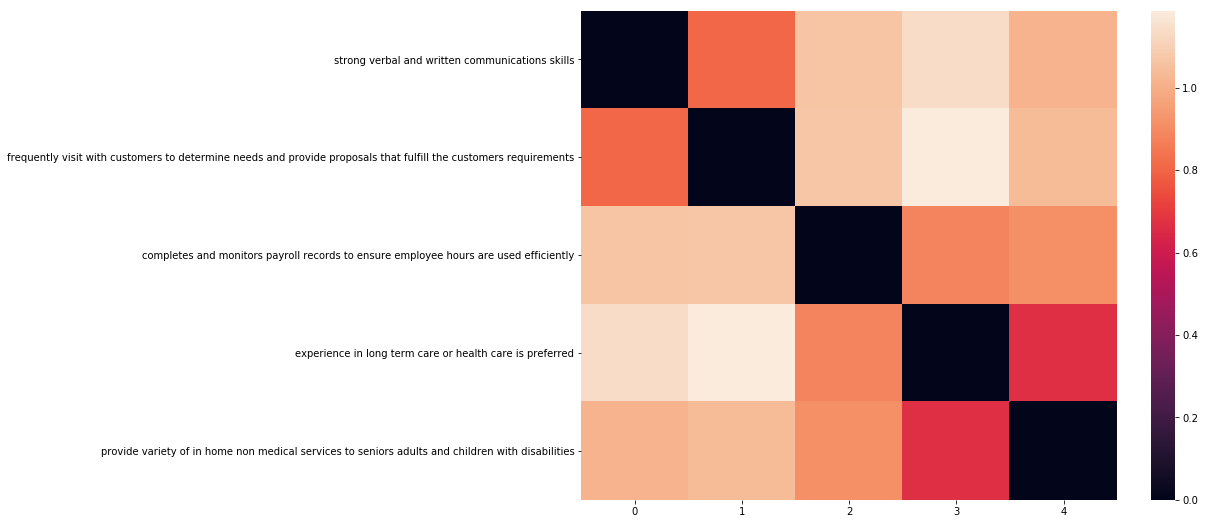

In [23]:
import seaborn as sns
from scipy.spatial.distance import pdist,squareform
from embed_software.utils import embed_docs

sents = [c for c in choices]
compare = embed_docs('../indeed-embeds/model', '\n'.join(choices))

m = squareform(pdist(np.array(compare), 'cosine'))
_ = sns.heatmap(pd.DataFrame(m, index= sents))

In [37]:


_.get_figure().savefig('figures/sentence-heatmap.png', bbox_inches='tight')

In [ ]:
# get set of random sentences from job ads. 

# plot heatmap


# MDS of Embedding in Training Space

In [4]:
SAMPLE_SIZE = 500000
SOC_LEVEL = 3

In [ ]:
X_train, y_train = dot_train_data(SOC_LEVEL)
X_test, y_test, ids = indeed_test_data('../data/us/everything.csv', SAMPLE_SIZE, SOC_LEVEL)

In [ ]:
vecs = PreEmbeddedVectorizer('../ss_embeds/ss_100_us_b.txt', '../ss_models/sentencespace_us', SAMPLE_SIZE, 100).fit_transform(X_train)
dot_dict = get_dictionary('', SOC_LEVEL)
vecs = vecs[:dot_dict.shape[0]]
y_train = y_train[:dot_dict.shape[0]]

In [ ]:
desc = 'desc_soc{}'.format(SOC_LEVEL)

lookup = dot_dict.groupby('soc').apply(lambda df: df.head(1))[['soc', desc]]
y_desc = pd.DataFrame({ 'soc': y_train}).merge(lookup, how='left', on='soc')
labels = y_desc[desc]

In [ ]:
occupations = np.random.choice(y_desc[desc].unique(), size=6, replace=False)
idx = y_desc[y_d<esc[desc].isin(occupations)].groupby(desc).apply(lambda df: df.sample(100)).index.levels[1]

In [ ]:
from sklearn.manifold import MDS, Isomap, TSNE
two = MDS().fit_transform(vecs[idx])

In [ ]:
import seaborn as sns

df = pd.DataFrame(two, columns = ['x', 'y']).assign(Category = labels[idx].astype('category').values)
ax = sns.scatterplot(x = 'x', y = 'y', hue = 'Category', data=df, s=100)
ax.get_figure().savefig('figures/MDS-soc2.png')